In [23]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0


In [11]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [12]:
crime_data_2019_2020 = crime_postcode_merge_df[["Reported Date", "Suburb - Incident", "Postcode - Incident", "Offence Level 1 Description",
                                               "Offence count", "long", "lat", "dc", "sa3name"]].copy()

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City


In [13]:
# Extract month and year
crime_data_2019_2020['Year'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).year
crime_data_2019_2020['Month'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).month

#Drop 2018 data 
crime_data_2019_2020 = crime_data_2019_2020[crime_data_2019_2020.Year != 2018]

crime_data_2019_2020.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1


In [14]:
#Create 2019 crime dataframe
crime_data_2019_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2020]

crime_data_2019_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1


In [15]:
#Create 2020 crime dataframe
crime_data_2020_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2019]

crime_data_2020_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month
143821,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143822,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143823,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143824,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1
143825,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1


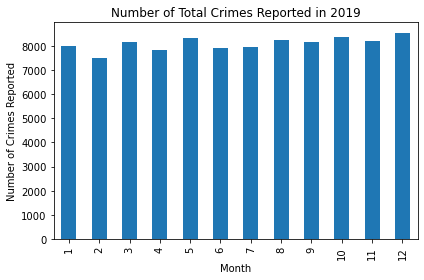

In [16]:
crime_2019 = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].count()
crime_2020 = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2019.plot(kind="bar", title="Number of Total Crimes Reported in 2019")
plt.ylabel("Number of Crimes Reported")
plt.tight_layout()
plt.show()

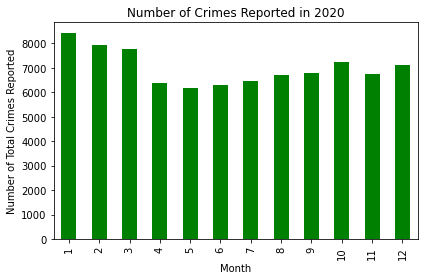

In [17]:
crime_2020.plot(kind="bar", title="Number of Crimes Reported in 2020", color="green")
plt.ylabel("Number of Total Crimes Reported")
plt.tight_layout()
plt.show()

In [57]:
combined_crime = pd.DataFrame ({
    "Crime 2019" : crime_2019,
    "Crime 2020" : crime_2020
})

combined_crime.plot(kind="bar", color=["blue", "green"])
plt.title("Number of Total Crimes Reported 19/20")
plt.xlabel("Month")
plt.ylabel("Number of Total Crimes Reported")
plt.tight_layout()
plt.ylim(0, 9000)
plt.show()

ValueError: If using all scalar values, you must pass an index

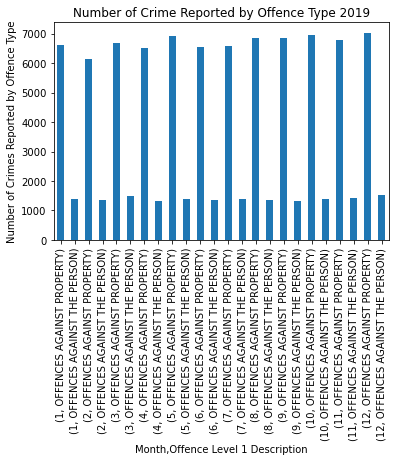

In [19]:
crime_2019_category = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2019_category.plot(kind="bar", title="Number of Crime Reported by Offence Type 2019")
plt.ylabel("Number of Crimes Reported by Offence Type")
plt.show()

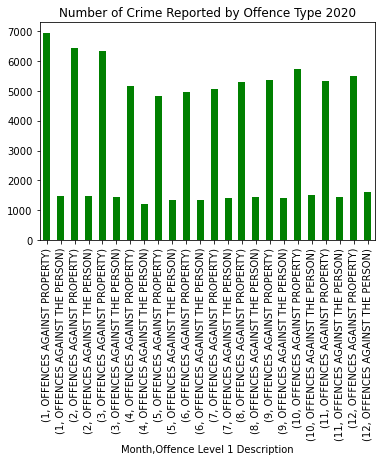

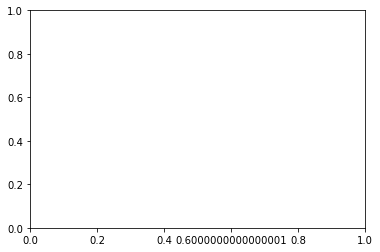

In [28]:
crime_2020_category = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2020_category.plot(kind="bar", title="Number of Crime Reported by Offence Type 2020", color="green")

# name_dict = {'1, OFFENCES AGAINST PROPERTY': 1, '1, OFFENCES AGAINST THE PERSON': 2, 
#              '2, OFFENCES AGAINST PROPERTY': 1, '2, OFFENCES AGAINST THE PERSON': 2,
#             '3, OFFENCES AGAINST PROPERTY': 1, '3, OFFENCES AGAINST THE PERSON': 2,
#             '4, OFFENCES AGAINST PROPERTY': 1, '4, OFFENCES AGAINST THE PERSON': 2,
#             '5, OFFENCES AGAINST PROPERTY': 1, '5, OFFENCES AGAINST THE PERSON': 2,
#             '6, OFFENCES AGAINST PROPERTY': 1, '6, OFFENCES AGAINST THE PERSON': 2,
#             '7, OFFENCES AGAINST PROPERTY': 1, '7, OFFENCES AGAINST THE PERSON': 2,
#             '8, OFFENCES AGAINST PROPERTY': 1, '8, OFFENCES AGAINST THE PERSON': 2,
#             '9, OFFENCES AGAINST PROPERTY': 1, '9, OFFENCES AGAINST THE PERSON': 2,
#             '10, OFFENCES AGAINST PROPERTY': 1, '10, OFFENCES AGAINST THE PERSON': 2,
#             '11, OFFENCES AGAINST PROPERTY': 1, '11, OFFENCES AGAINST THE PERSON': 2,
#             '12, OFFENCES AGAINST PROPERTY': 1, '12, OFFENCES AGAINST THE PERSON': 2
#             }


def update_ticks(x, pos):
    if x == "1, OFFENCES AGAINST PROPERTY":
        return 'against property'
    elif pos == "1, OFFENCES AGAINST THE PERSON":
        return 'against person'
    else:
        return x


fig,ax=plt.subplots()


# ax.xticks(name_dict.values())
# ax.set_xticklabels(name_dict.keys())


# ax.bar(crime_2020_category)


ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
plt.show()

In [ ]:
crime_2020_category = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2020_category.plot(kind="bar", title="Number of Crime Reported by Offence Type 2020", color="green")
plt.ylabel("Number of Crimes Reported by Offence Type")



name_dict = {'1, OFFENCES AGAINST PROPERTY': 1, '1, OFFENCES AGAINST THE PERSON': 2, 
             '2, OFFENCES AGAINST PROPERTY': 1, '2, OFFENCES AGAINST THE PERSON': 2,
            '3, OFFENCES AGAINST PROPERTY': 1, '3, OFFENCES AGAINST THE PERSON': 2,
            '4, OFFENCES AGAINST PROPERTY': 1, '4, OFFENCES AGAINST THE PERSON': 2,
            '5, OFFENCES AGAINST PROPERTY': 1, '5, OFFENCES AGAINST THE PERSON': 2,
            '6, OFFENCES AGAINST PROPERTY': 1, '6, OFFENCES AGAINST THE PERSON': 2,
            '7, OFFENCES AGAINST PROPERTY': 1, '7, OFFENCES AGAINST THE PERSON': 2,
            '8, OFFENCES AGAINST PROPERTY': 1, '8, OFFENCES AGAINST THE PERSON': 2,
            '9, OFFENCES AGAINST PROPERTY': 1, '9, OFFENCES AGAINST THE PERSON': 2,
            '10, OFFENCES AGAINST PROPERTY': 1, '10, OFFENCES AGAINST THE PERSON': 2,
            '11, OFFENCES AGAINST PROPERTY': 1, '11, OFFENCES AGAINST THE PERSON': 2,
            '12, OFFENCES AGAINST PROPERTY': 1, '12, OFFENCES AGAINST THE PERSON': 2
            }

plt.xticks(name_dict.values())
ax.set_xticklabels(name_dict.keys())
plt.show()

In [24]:
crime_2020_category

Month  Offence Level 1 Description
1      OFFENCES AGAINST PROPERTY      6949
       OFFENCES AGAINST THE PERSON    1488
2      OFFENCES AGAINST PROPERTY      6441
       OFFENCES AGAINST THE PERSON    1478
3      OFFENCES AGAINST PROPERTY      6325
       OFFENCES AGAINST THE PERSON    1443
4      OFFENCES AGAINST PROPERTY      5158
       OFFENCES AGAINST THE PERSON    1207
5      OFFENCES AGAINST PROPERTY      4833
       OFFENCES AGAINST THE PERSON    1329
6      OFFENCES AGAINST PROPERTY      4979
       OFFENCES AGAINST THE PERSON    1328
7      OFFENCES AGAINST PROPERTY      5051
       OFFENCES AGAINST THE PERSON    1421
8      OFFENCES AGAINST PROPERTY      5283
       OFFENCES AGAINST THE PERSON    1426
9      OFFENCES AGAINST PROPERTY      5366
       OFFENCES AGAINST THE PERSON    1411
10     OFFENCES AGAINST PROPERTY      5741
       OFFENCES AGAINST THE PERSON    1505
11     OFFENCES AGAINST PROPERTY      5317
       OFFENCES AGAINST THE PERSON    1426
12     OFFENCES AGA

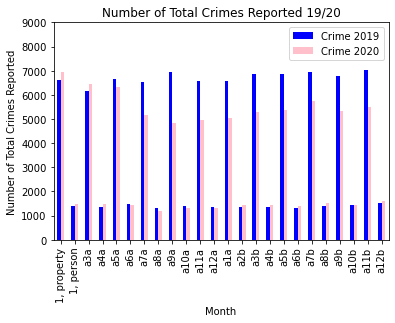

In [55]:
combined_crime_category = pd.DataFrame ({
    "Crime 2019" : crime_2019_category,
    "Crime 2020" : crime_2020_category
})

combined_crime_category.plot(kind="bar", color=["blue", "pink"])
plt.title("Number of Total Crimes Reported 19/20")
# ax.set_xticks(["Against Property", "Against Person"])
plt.xlabel("Month")
# plt.xticks(["1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2"], rotation=90)

tickvalues = range(0,24)

plt.xticks(ticks=tickvalues, labels=["1, property", "1, person", "a3a", "a4a", "a5a", "a6a", "a7a", "a8a", "a9a", "a10a", "a11a", "a12a", 
            "a1a", "a2b", "a3b", "a4b", "a5b", "a6b", "a7b", "a8b", "a9b", "a10b", "a11b", "a12b"], rotation=90)

plt.ylabel("Number of Total Crimes Reported")
plt.ylim(0, 9000)
plt.show()

In [ ]:
"a", "b", "a", "a", "a", "a", "a", "a", "a", "a", "a", "a", "a", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b"